# Cropping Models

https://github.com/shaoanlu/GazeML-keras

In [7]:
# Imports
import pandas as pd
import os
import io 
import cv2
import numpy as np
from matplotlib import pyplot as plt
from keras.models import load_model
from detector.face_detector import MTCNNFaceDetector
import tensorflow as tf
from tensorflow.keras import datasets, layers, models
import matplotlib.pyplot as plt

In [ ]:
!python --version

In [ ]:
import keras
import tensorflow as tf
print(keras.__version__)
print(tf.__version__)

## Models Integration


In [8]:
# Functions 
def Image_croping(image , detect_model_path):
    """ return left eye and right eye image cropped"""
   ## loading wieghts
    fd = MTCNNFaceDetector(sess=tf.compat.v1.keras.backend.get_session(), model_path=detect_model_path) # loading face detection model
    face, lms = fd.detect_face(image) # detect the number of faces 
    if len(face) == 1 : 
        left_eye_im, right_eye_im = fd.cropImage(image,lms)
        return left_eye_im , right_eye_im , face
    if len(face) > 1 :
        return 'Multiple faces detected' , 'Multiple faces detected'  , face
    return 'No face detected' ,  'No face detected' , face


def Eyes_diagnosis(left_eye_im , right_eye_im , diagnosis_model_path):
    
    """ return description and probability of disease for each eye"""
    
    model = load_model(diagnosis_model_path) # load disease detection model 
    ############################# left eye #############################
    left_eye_im = cv2.resize(left_eye_im, (100, 100))  
    left_eye_im = left_eye_im.reshape(1 ,100 , 100 , -1)
    
    left_eye_im_diagnosis = model.predict(left_eye_im)
    
    if left_eye_im_diagnosis > 0.56:
        left_eye_im_desc =  ' Left Eye : Cataract detected'
    else :
        left_eye_im_desc = 'Left Eye : No Cataract detected'
    
    
    ############################# right eye #############################
    right_eye_im = cv2.resize(right_eye_im, (100, 100))
    right_eye_im = right_eye_im.reshape(1 ,100 , 100 , -1)
    right_eye_im_diagnosis  = model.predict(right_eye_im)
    
    if right_eye_im_diagnosis > 0.56:
        right_eye_im_desc =  'Right Eye : Cataract detected'
    else :
        right_eye_im_desc = 'Right Eye : No Cataract detected'
    
    return left_eye_im_desc ,left_eye_im_diagnosis[0], right_eye_im_desc , right_eye_im_diagnosis[0]

def Diagnose_patient(image , detect_model_path , diagnosis_model_path):
    left_eye_im , right_eye_im , face = Image_croping(image , detect_model_path) # crop eyes & ensure image is good for diagnosis
    
    if len(face) != 1 :
        return left_eye_im , left_eye_im, left_eye_im , left_eye_im , left_eye_im , left_eye_im  
        
    left_eye_im_desc ,left_eye_im_diagnosis, right_eye_im_desc , right_eye_im_diagnosis = Eyes_diagnosis(left_eye_im , right_eye_im , diagnosis_model_path) # diagnosis 
    
    return left_eye_im , left_eye_im_desc , left_eye_im_diagnosis , right_eye_im , right_eye_im_desc , right_eye_im_diagnosis



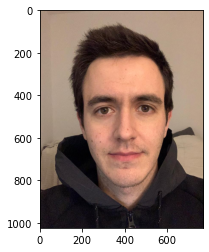

In [4]:
import cv2
import matplotlib.pyplot as plt
img_path = "images/rob.jpeg"
#img_path = "images/mop.jpg"
img = cv2.imread(img_path)[..., ::-1]
plt.imshow(img)

In [9]:
detect_model_path = 'mtcnn_weights'
left_eye_im, right_eye_im, face = Image_croping(img,detect_model_path)

In [ ]:
#import sys
#sys.path.append('..')
#sys.path

In [10]:
diagnosis_model_path='../saved_models/Final_models/accuracy-92size100x100_Threshold_0.56.h5'
left_eye_im_desc,left_eye_im_diagnosis,right_eye_im_desc,right_eye_im_diagnosis=Eyes_diagnosis(left_eye_im,right_eye_im,diagnosis_model_path)

OSError: SavedModel file does not exist at: ../saved_models/Final_models/accuracy-92size100x100_Threshold_0.56.h5/{saved_model.pbtxt|saved_model.pb}

In [ ]:
left_eye_im_diagnosis
left_eye_im_desc

In [ ]:
left_eye_im ,left_eye_im_desc ,left_eye_im_diagnosis ,right_eye_im ,right_eye_im_desc ,right_eye_im_diagnosis=Diagnose_patient(img,detect_model_path,diagnosis_model_path)

# Library Creation

In [ ]:
!python setup.py bdist_wheel --universal